**Linear Data**


In [1]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


In [2]:




# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [5] * 5  # You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    "b": {"a": lambda a: a * 0.7},
    "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
    "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
    "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1}
}


{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b37171000>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b37171090>}} aggregator_functions


In [3]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [4]:

# Sample data from the model
sampled_data = hscm.sample_data()


a sample node
a sample node
a sample node
a sample node
a sample node
c sample node
c sample node
c sample node
c sample node
c sample node
e sample node
e sample node
e sample node
e sample node
e sample node


a


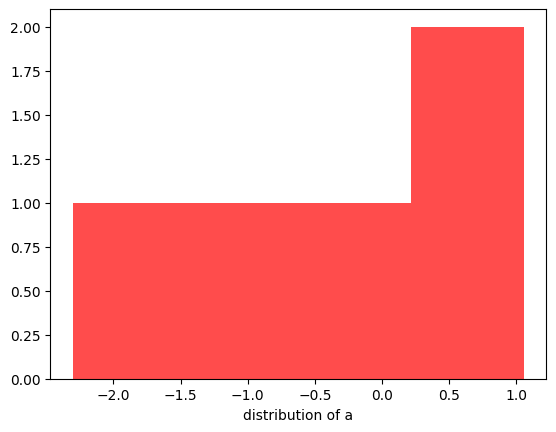

c


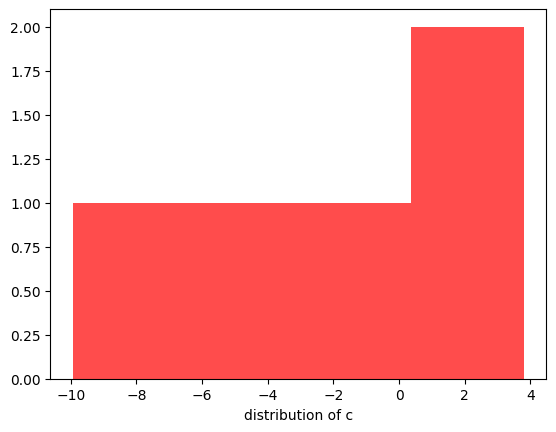

e


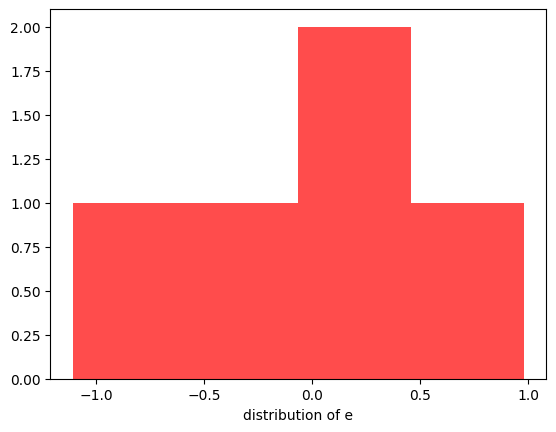

[[-2.3004633641998082,
  -0.7816059591116685,
  -0.6002164577695598,
  1.055700648448583,
  1.0558552941262596],
 [-9.930846956679277,
  -2.17521638241343,
  -3.666127625903564,
  3.8043763837989006,
  2.833200794558659],
 [0.16749722332447398,
  -1.1077484445921333,
  0.9794417868694151,
  0.31284748501522713,
  -0.24644424906251866]]

In [5]:

# Plot the sampled data
hscm.plot_data()


In [6]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [7]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.sample_data()


a sample node
a sample node
a sample node
a sample node
a sample node
c sample node
c sample node
c sample node
c sample node
c sample node
e sample node
e sample node
e sample node
e sample node
e sample node


a


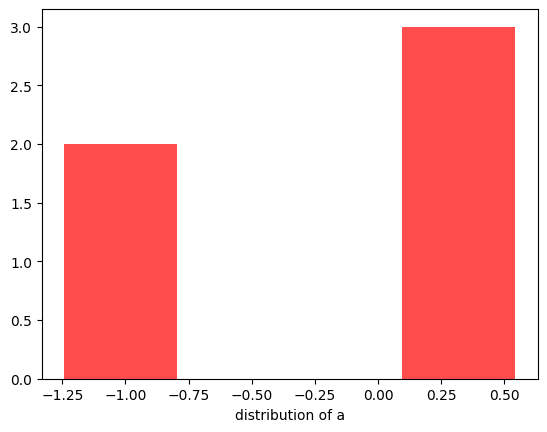

c


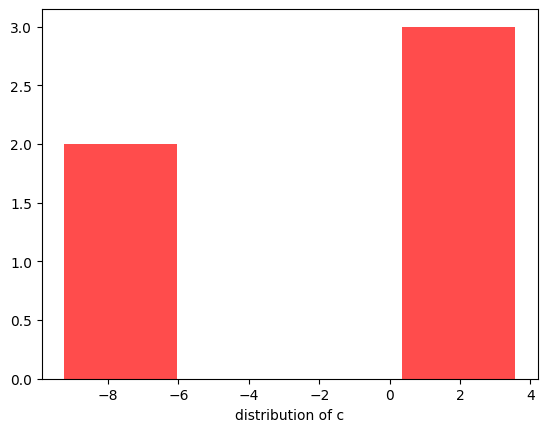

e


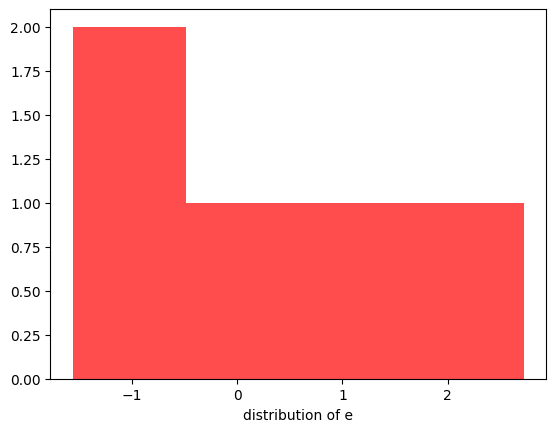

[[0.5432314603555067,
  -0.8985370522004197,
  -1.2423668725646102,
  0.4220195904677748,
  0.45751363827390024],
 [3.5661286503636926,
  -6.092318863596264,
  -9.245479911819844,
  0.7913285386466578,
  2.9308924942195698],
 [2.724144801681674,
  -0.8191965281147482,
  -1.559816473241077,
  0.7341437178578571,
  0.5224628420984625]]

In [8]:


# Plot the new sampled data
hscm.plot_data()


KL Divergence

In [9]:

def run_experiment(k):
    print(k)
    # Define the HSCM model structure
    nodes = ["a", "b", "c", "d", "e"]
    edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e")]
    unit_nodes = ["a", "c", "e"]
    subunit_nodes = ["d", "b"]
    sizes = [50] * 50  # You can adjust this based on your data

    # Initialize the HSCM model
    hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

    # Define random functions for each node
    random_functions = {
        "a": lambda x: norm.ppf(x, 0, 1),
        "b": lambda x: norm.ppf(x, 0, 1),
        "c": lambda x: norm.ppf(x, 0, 1),
        "d": lambda x: norm.ppf(x, 0, 1),
        "e": lambda x: norm.ppf(x, 0, 1)
    }

    # Define additive functions for each node
    additive_functions = {
        "a": {},
        "b": {"a": lambda a: a * 0.7},
        "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
        "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
        "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.mean((np.array(list(b))))}
    }

    # Set up the HSCM model
    hscm.additive_model(additive_functions, random_functions)

    # Sample data from the model
    sampled_data = hscm.sample_data()
    print('sampled data !')

    # Set distributions from the sampled data
    hscm.set_distribution_from_data()

    # Resample data
    resampled_data = hscm.sample_data()
    print('sampled data 2 !!!!!')

    kl_divergences = {}
    for node in unit_nodes:
        original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
        resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
        
        # Calculate histograms
        hist_original, _ = np.histogram(original, bins=50, density=True)
        hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
        hist_original += 1e-10
        hist_resampled += 1e-10
        
        # Normalize
        hist_original /= hist_original.sum()
        hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
        kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
        kl_divergences[node] = kl_divs
    print('kl_divergences', kl_divergences)
    return kl_divergences

In [10]:

# Run the experiment 100 times
results = [run_experiment(k) for k in range(50)]


0
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b370839a0>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b37083880>, '_b': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b37083e20>}} aggregator_functions
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
c sample node
c sample node
c sample node
c sampl

In [11]:
print(results)

[{'a': 4.2581748103247445, 'c': 6.5630347512468585, 'e': 9.244771916414964}, {'a': 8.483801787390371, 'c': 5.907939963638734, 'e': 6.807593647101737}, {'a': 11.280386660011951, 'c': 6.44809363073774, 'e': 5.649588627722318}, {'a': 9.019696073138864, 'c': 3.847365110803592, 'e': 7.153019921879474}, {'a': 8.85109973019182, 'c': 7.282697178640467, 'e': 5.881645236620306}, {'a': 6.109174786506022, 'c': 5.205101516799163, 'e': 7.782721711180174}, {'a': 6.131333223313851, 'c': 6.627630082974266, 'e': 7.684164386040226}, {'a': 5.4743661708952205, 'c': 6.036097680452416, 'e': 8.326777659761476}, {'a': 5.405447684856204, 'c': 4.269098821840043, 'e': 6.872791822678196}, {'a': 6.754371847495756, 'c': 3.9637881259162313, 'e': 6.859223414599012}, {'a': 6.205551346304855, 'c': 5.928063763518359, 'e': 10.232955263089831}, {'a': 4.92330587649416, 'c': 4.140179380822423, 'e': 5.74597482290888}, {'a': 5.471464452411024, 'c': 5.665676972529577, 'e': 7.001991627803254}, {'a': 7.6320555338325295, 'c': 6.39

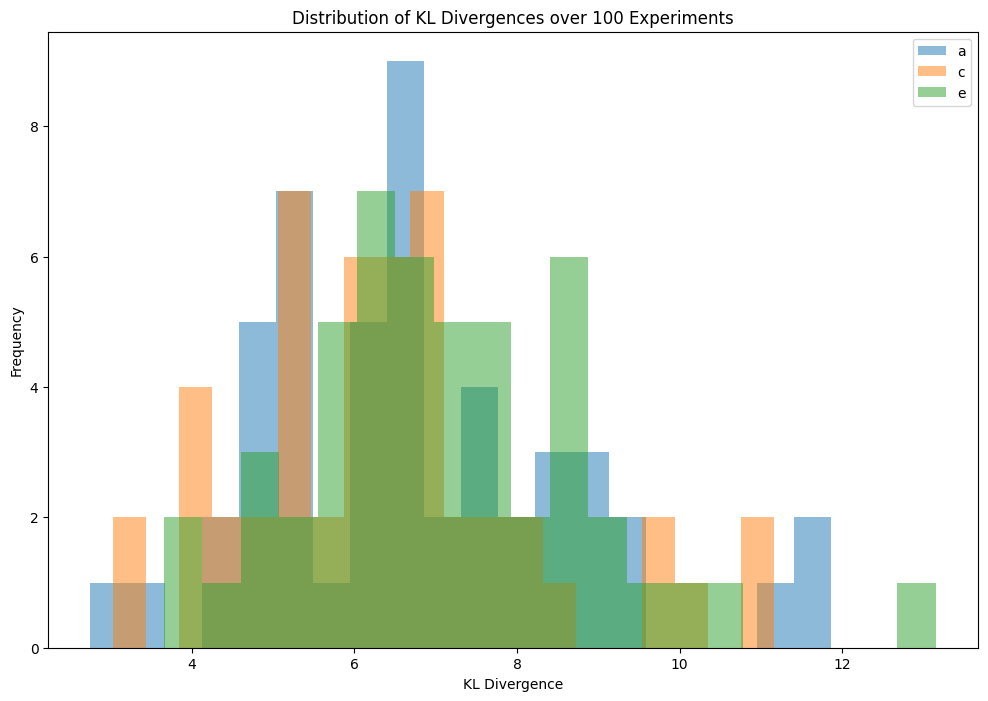

a:
  Mean: 6.7718
  Std Dev: 1.9413
  Min: 2.7555
  Max: 11.8654

c:
  Mean: 6.3749
  Std Dev: 1.8001
  Min: 3.0330
  Max: 11.1608

e:
  Mean: 7.0607
  Std Dev: 1.7981
  Min: 3.6559
  Max: 13.1506



In [12]:

# Analyze the results
kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Plot the distribution of KL divergences for each node
plt.figure(figsize=(12, 8))
for node, divergences in kl_divergences.items():
    plt.hist(divergences, bins=20, alpha=0.5, label=node)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.title('Distribution of KL Divergences over 100 Experiments')
plt.legend()
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [13]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices])
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    return accuracy


In [14]:

original_vectors = create_vector(sampled_data, sizes)
new_vectors = create_vector(new_sampled_data, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.43      0.60         7

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10



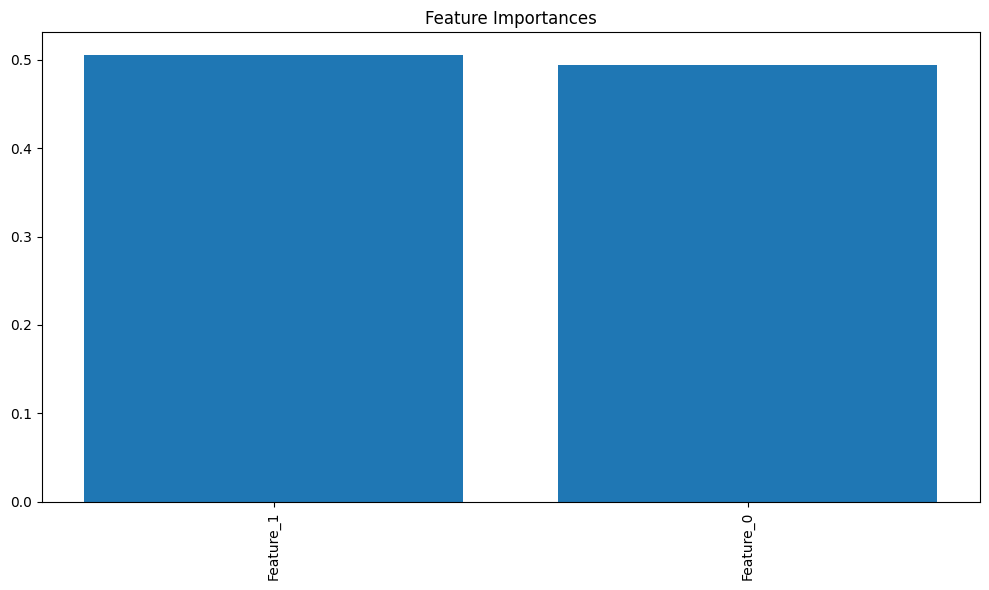

0.6

In [15]:
hscm_classification_pipeline(X, y)

**Non-linear Data**

In [16]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon


In [17]:




# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [50] * 50  # You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    "b": {"a": lambda a: a * 0.7},
    "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
    "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
    "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.mean((np.array(list(b))))}
}


{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b3497f7f0>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b3497f490>, '_b': <function HSCM.__init__.<locals>.<lambda> at 0x7f3b3497c040>}} aggregator_functions


In [18]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [19]:

# Sample data from the model
sampled_data = hscm.sample_data()


a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c samp

a


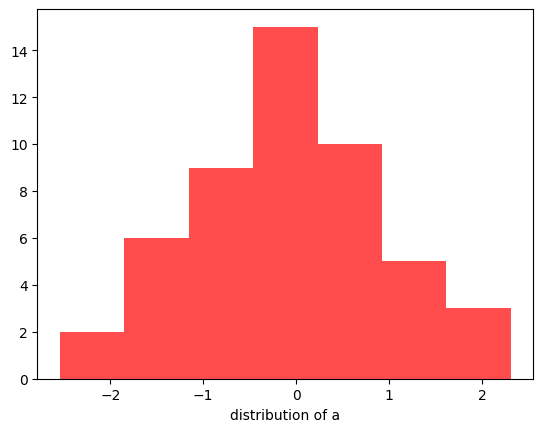

c


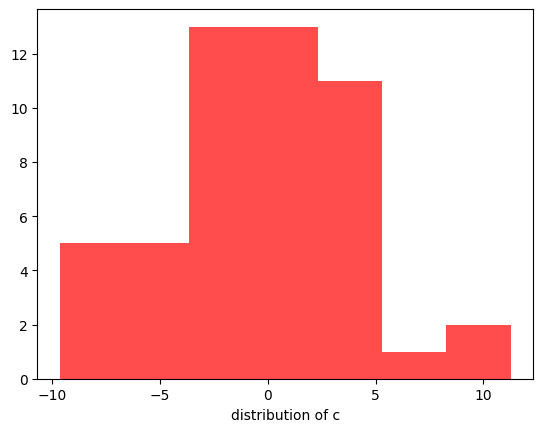

e


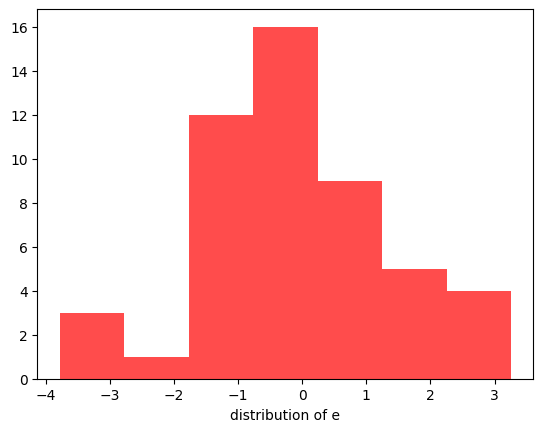

[[-0.19416135330774253,
  0.1790445225101866,
  0.19482886395971044,
  0.8161096892520074,
  2.306300496640322,
  -0.7105406098987338,
  -1.2377599916492095,
  1.8413726848899312,
  -0.26354165794789663,
  0.29409597701462914,
  -0.9335073840178866,
  1.7580873531200816,
  -0.8180923801676726,
  1.0808175201284154,
  -1.714704674778398,
  0.9913523974218966,
  0.741024101168151,
  1.1105152970887955,
  -1.6440568368988857,
  -0.2016716731318204,
  -1.7220924419081962,
  -0.28360434622051933,
  1.0556548209425942,
  0.6177296056535675,
  1.1057955797577146,
  -0.5683536538410848,
  -0.3555323784786758,
  0.8075600616143871,
  -0.7136677444420975,
  -2.54130028500388,
  -0.4467038142941954,
  0.6957293495822692,
  -0.4533281235786247,
  0.01887200606102159,
  0.683124558344982,
  0.900724465851586,
  -1.419625084796121,
  0.7583465745482528,
  -0.9805496540722134,
  -2.3609171487997833,
  -0.9388551417830564,
  -0.3091012457364721,
  -1.6935953986544312,
  -0.3462080276344516,
  -0.13236

In [20]:

# Plot the sampled data
hscm.plot_data()


In [21]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [22]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.sample_data()


a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
a sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c sample node
c samp

a


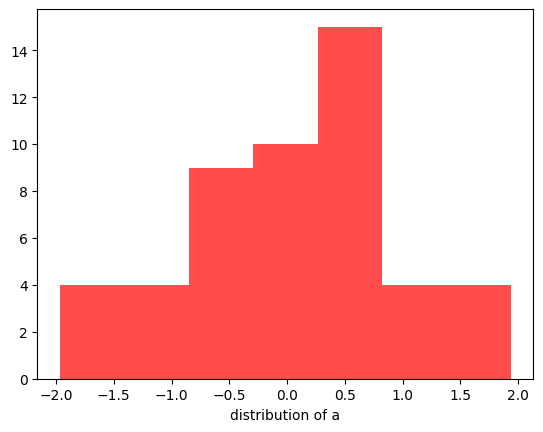

c


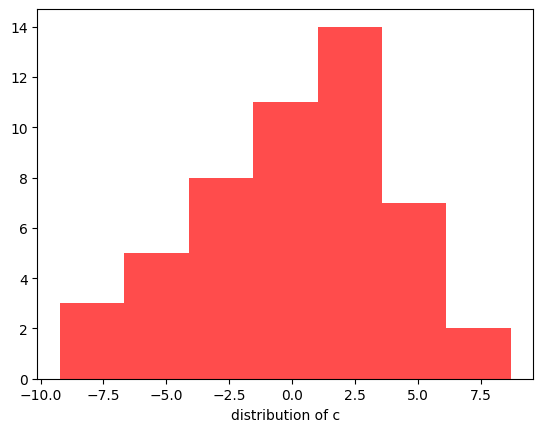

e


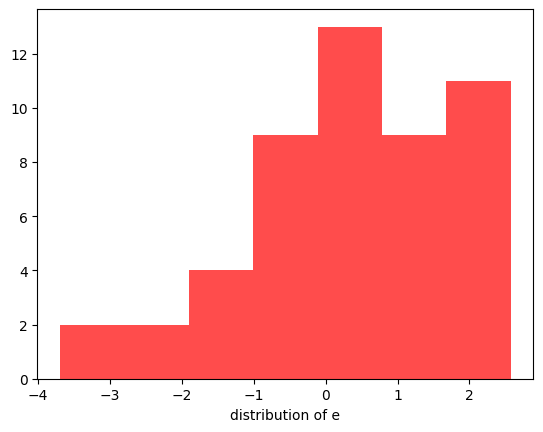

[[-0.1852487549185722,
  -1.9661176400355602,
  -0.6925847344238434,
  0.7884271730412754,
  0.5474517854887015,
  -0.3457430920312187,
  -0.2925603573635627,
  0.692178734270111,
  0.46475766561374765,
  -1.7627874303067794,
  -0.45624587139708483,
  0.07458542954603886,
  0.338090239542996,
  0.8432915725268207,
  -0.6053880924564423,
  0.6709529301079693,
  0.7401206623992044,
  0.7245629977439071,
  0.03435653919460058,
  -1.1749722378362106,
  1.2801856385053294,
  -1.2817306275719778,
  0.6614417706107072,
  -0.107187168480461,
  -0.16703916788252146,
  -0.9442317102820643,
  -1.5841178607249617,
  -0.6593804092606806,
  0.1755071696789396,
  -0.5626143877056808,
  1.600288356756892,
  1.3805467655177683,
  -0.42121339312575257,
  0.7731300835602575,
  0.3889143994031862,
  -0.22192011513205023,
  1.2244340609669768,
  0.785976847396647,
  0.12925636511411864,
  0.7221567877124837,
  0.48839137710113784,
  -0.18516812416979506,
  -1.5410094333431958,
  -0.9010952147862351,
  -0.3

In [23]:


# Plot the new sampled data
hscm.plot_data()


KL Divergence

In [ ]:

def run_experiment(k):
    print(k)
    # Define the HSCM model structure
    nodes = ["a", "b", "c", "d", "e"]
    edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"), ("b", "e")]
    unit_nodes = ["a", "c", "e"]
    subunit_nodes = ["d", "b"]
    sizes = [50] * 50  # You can adjust this based on your data

    # Initialize the HSCM model
    hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

    # Define random functions for each node
    random_functions = {
        "a": lambda x: norm.ppf(x, 0, 1),
        "b": lambda x: norm.ppf(x, 0, 1),
        "c": lambda x: norm.ppf(x, 0, 1),
        "d": lambda x: norm.ppf(x, 0, 1),
        "e": lambda x: norm.ppf(x, 0, 1)
    }

    # Define additive functions for each node
    additive_functions = {
        "a": {},
        "b": {"a": lambda a: a * 0.7},
        "c": {"a": lambda a: a * 2, "b": lambda b: np.mean(np.array(list(b))) * 3},
        "d": {"b": lambda b: b * 1.5, "c": lambda c: c * 0.4},
        "e": {"d": lambda d: np.mean(np.array(list(d))) * 0.1, "b": lambda b: np.mean((np.array(list(b))))}
    }

    # Set up the HSCM model
    hscm.additive_model(additive_functions, random_functions)

    # Sample data from the model
    sampled_data = hscm.sample_data()
    print('sampled data !')

    # Set distributions from the sampled data
    hscm.set_distribution_from_data()

    # Resample data
    resampled_data = hscm.sample_data()
    print('sampled data 2 !!!!!')

    kl_divergences = {}
    for node in unit_nodes:
        original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
        resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
        
        # Calculate histograms
        hist_original, _ = np.histogram(original, bins=50, density=True)
        hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
        hist_original += 1e-10
        hist_resampled += 1e-10
        
        # Normalize
        hist_original /= hist_original.sum()
        hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
        kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
        kl_divergences[node] = kl_divs
    print('kl_divergences', kl_divergences)
    return kl_divergences

In [ ]:

# Run the experiment 100 times
results = [run_experiment(k) for k in range(50)]


In [ ]:
print(results)

In [ ]:

# Analyze the results
kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Plot the distribution of KL divergences for each node
plt.figure(figsize=(12, 8))
for node, divergences in kl_divergences.items():
    plt.hist(divergences, bins=20, alpha=0.5, label=node)
plt.xlabel('KL Divergence')
plt.ylabel('Frequency')
plt.title('Distribution of KL Divergences over 100 Experiments')
plt.legend()
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [94]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices])
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    return accuracy


In [ ]:

original_vectors = create_vector(sampled_data, sizes)
new_vectors = create_vector(new_sampled_data, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


In [ ]:
hscm_classification_pipeline(X, y)

KL Divergence

AUC